## Observations and Insights
#### Add your analysis here
---

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np

%matplotlib notebook
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how= "outer")
# Display the data table for preview
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [66]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [67]:
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [68]:
# Check the number of mice.
mice = mouse_metadata['Mouse ID'].value_counts()
number_of_mice = len(mice)
print(number_of_mice)

249


In [69]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#dup_mouse_id = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
#dup_mouse_id

mice_duplicate = merge_df[merge_df.duplicated(["Mouse ID","Timepoint"], keep =False)]
mice_duplicate["Mouse ID"].unique()

array(['g989'], dtype=object)

In [70]:
dup = merge_df["Mouse ID"] == 'g989'

In [71]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df[merge_df["Mouse ID"] == mice_duplicate["Mouse ID"].unique()[0]]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [72]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexNames = clean_data[clean_data['Mouse ID'] == mice_duplicate["Mouse ID"].unique()[0]].index
clean_data.drop(indexNames,inplace=True)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [73]:
# Check the number of mice in the clean DataFrame.
mice = clean_data['Mouse ID'].unique() 
number_of_mice = len(mice)
print(number_of_mice)

248


## Summary Statistics

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_drug = clean_data.groupby('Drug Regimen')


# Use this straighforward method, create multiple series and put them all in a dataframe at the end.
grouped_drug = grouped_drug.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
grouped_drug

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_drug = clean_data.groupby(['Drug Regimen'])

mean = grouped_drug["Tumor Volume (mm3)"].mean()
mean                               

median = grouped_drug["Tumor Volume (mm3)"].median()
median

var = grouped_drug["Tumor Volume (mm3)"].var()

std = grouped_drug["Tumor Volume (mm3)"].std()

sem = grouped_drug["Tumor Volume (mm3)"].sem()

# Use method to produce everything with a single groupby function
sum = pd.DataFrame({"mean": mean, "median": median, "var": var, "std": std, "sem": sem})
sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<IPython.core.display.Javascript object>


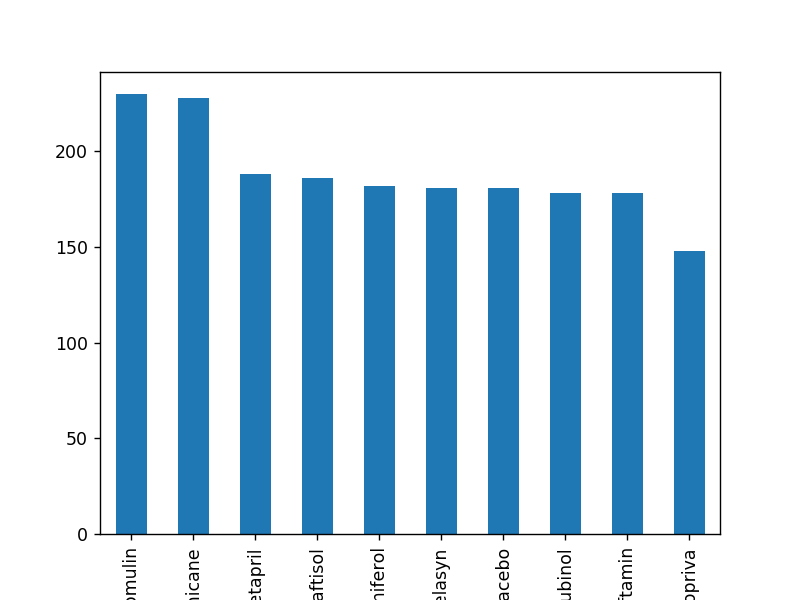

In [76]:
plt.figure(1)
clean_data['Drug Regimen'].value_counts().plot(kind='bar')

<IPython.core.display.Javascript object>


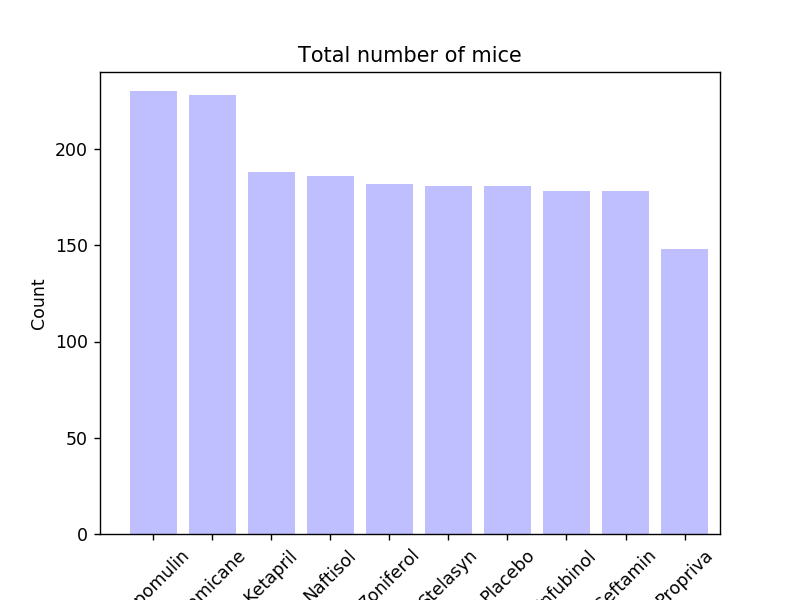

Text(0, 0.5, 'Count')

In [77]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment = clean_data["Drug Regimen"].value_counts()

# Set x axis and tick locations
x_axis = np.arange(len(treatment))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(2)
plt.bar(x_axis, treatment, color='b', alpha=0.25, align="edge")
plt.xticks(tick_locations, treatment.index, rotation="45")

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(treatment)+10)

plt.title("Total number of mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

list = {"Sex": ["Male", "Female"], "Percentage": [0.45, 0.55]}
df = pd.DataFrame(list)

Sex = clean_data.groupby(['Sex'])
Sex['Sex'].value_counts()

Sex     Sex   
Female  Female    922
Male    Male      958
Name: Sex, dtype: int64

In [79]:
only_male = clean_data.loc[clean_data["Sex"]== "Male", :]
male = only_male["Mouse ID"].unique()
total_male = len(male)
per_male = total_male*100/number_of_mice

only_female = clean_data.loc[clean_data["Sex"]== "Female", :]
female = only_female["Mouse ID"].unique()
total_female = len(female)
per_female = total_female*100/number_of_mice

gender_df = pd.DataFrame([[total_female, per_female], [total_male, per_male]], index=["Female","Male"], columns=["Total Count","Percentage of Mouse"])
gender_df

,Total Count,Percentage of Mouse
Female,123,49.596774
Male,125,50.403226


<IPython.core.display.Javascript object>


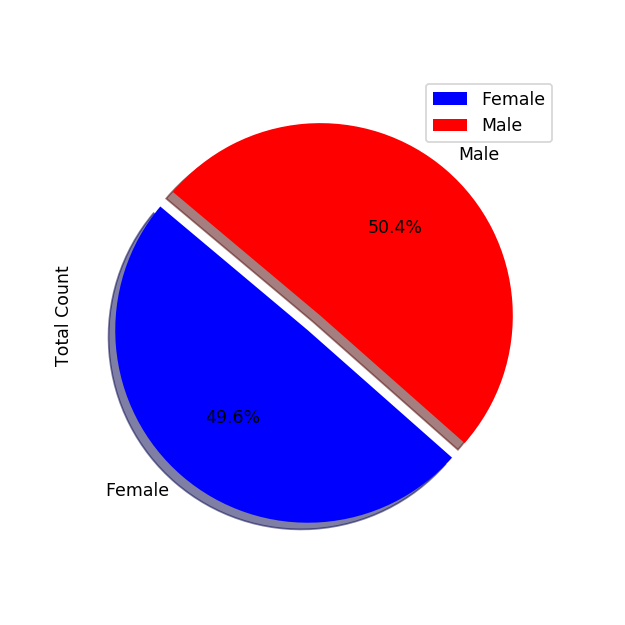

In [80]:
colors = ['blue', 'red']
explode = (0.1, 0)
plot = gender_df.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

<IPython.core.display.Javascript object>


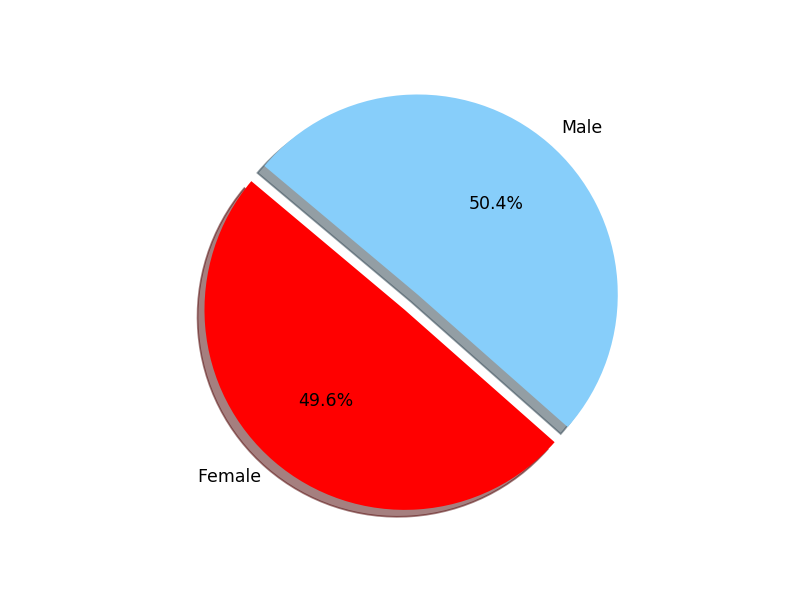

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [49.6, 50.4]

# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

plt.figure(4)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [83]:
mouse_id = clean_data.groupby(["Mouse ID", "Drug Regimen"])
mouse_id.head()
max_timepoint = mouse_id["Timepoint"].max()
max_timepoint

df_1 = pd.DataFrame({"Timepoint": max_timepoint})
df_1

df_1 = df_1.reset_index()
df_1

last_tumor = pd.merge(df_1, clean_data, on= ("Mouse ID", "Timepoint", "Drug Regimen"), how= "left")
last_tumor

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a262,Placebo,45,Female,17,29,70.717621,4
3,a275,Ceftamin,45,Female,20,28,62.999356,3
4,a366,Stelasyn,30,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,10,Female,12,26,48.710661,0
244,z578,Ramicane,45,Male,11,16,30.638696,0
245,z581,Infubinol,45,Female,24,25,62.754451,3
246,z795,Naftisol,45,Female,13,29,65.741070,3


In [84]:
only_Capomulin = clean_data.loc[merge_df['Drug Regimen'] == "Capomulin", :]
only_Capomulin
Capomulin = only_Capomulin['Tumor Volume (mm3)']
only_Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [85]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# Determine outliers using upper and lower bounds

for drug in treatment_list:
    only_drug = clean_data.loc[merge_df['Drug Regimen'] == drug, :]
    drug_name = only_drug["Tumor Volume (mm3)"]
    quartiles = drug_name.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of tumor sizes is: {lowerq}")
    print(f"The upper quartile of tumor sizes is: {upperq}")
    print(f"The interquartile range of tumor sizes is: {iqr}")
    print(f"The the median of tumor sizes is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{drug}: Values below {lower_bound} could be outliers.")
    print(f"{drug}: Values above {upper_bound} could be outliers.")
    
    tumor_df = pd.DataFrame({"Tumor Volume (mm3)": drug_name})
    tumor_df
    
    tumor = pd.DataFrame({"Tumor Volume (mm3)": drug_name})
    tumor
    outliers = tumor.loc[(tumor["Tumor Volume (mm3)"] > upper_bound) | (tumor["Tumor Volume (mm3)"] < lower_bound ), :] 
    outliers
    print(f" Outliers: {outliers['Tumor Volume (mm3)']}")
    print("\n")

The lower quartile of tumor sizes is: 37.685932865
The upper quartile of tumor sizes is: 45.0
The interquartile range of tumor sizes is: 7.314067135000002
The the median of tumor sizes is: 41.557808879999996 
Capomulin: Values below 26.714832162499995 could be outliers.
Capomulin: Values above 55.9711007025 could be outliers.
 Outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64


The lower quartile of tumor sizes is: 36.67463458499999
The upper quartile of tumor sizes is: 45.0
The interquartile range of tumor sizes is: 8.325365415000007
The the median of tumor sizes is: 40.67323554 
Ramicane: Values below 24.18658646249998 could be outliers.
Ramicane: Values above 57.48804812250001 could be outliers.
 Outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64


The lower quartile of tumor sizes is: 47.3123533
The upper quartile of tumor sizes is: 57.314443967500004
The interquartile range of tumor sizes is: 10.002090667500006
The the median of tumo

In [86]:
only_drug = clean_data.loc[merge_df['Drug Regimen'] == "Infubinol", :]
drug_name = only_drug["Tumor Volume (mm3)"]
tumor_df = pd.DataFrame({"Tumor Volume (mm3)": drug_name})
tumor_df
outliers = tumor_df.loc[(tumor_df["Tumor Volume (mm3)"] > 72.31757996875001 ) | (tumor_df["Tumor Volume (mm3)"] < 32.309217298749985 ), :] 
outliers

,Tumor Volume (mm3)


In [87]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
last_tumor

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a262,Placebo,45,Female,17,29,70.717621,4
3,a275,Ceftamin,45,Female,20,28,62.999356,3
4,a366,Stelasyn,30,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,10,Female,12,26,48.710661,0
244,z578,Ramicane,45,Male,11,16,30.638696,0
245,z581,Infubinol,45,Female,24,25,62.754451,3
246,z795,Naftisol,45,Female,13,29,65.741070,3


<IPython.core.display.Javascript object>


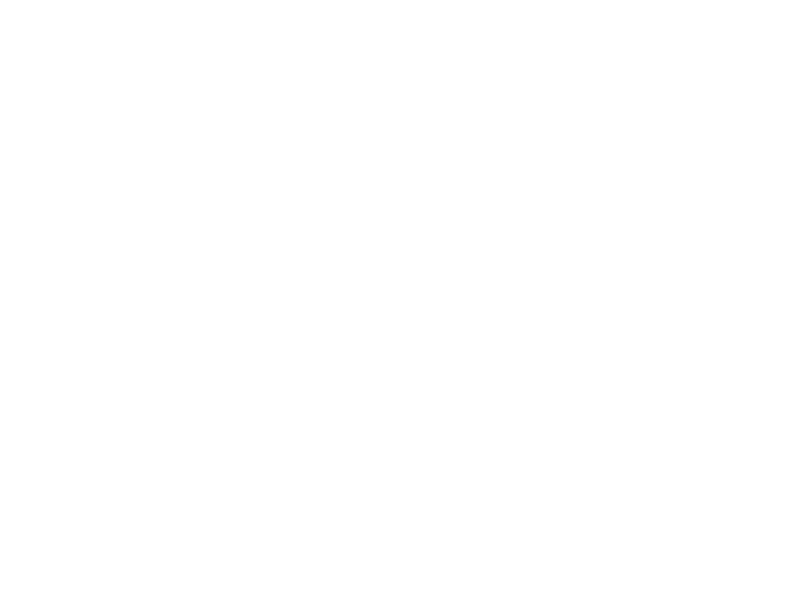

<IPython.core.display.Javascript object>


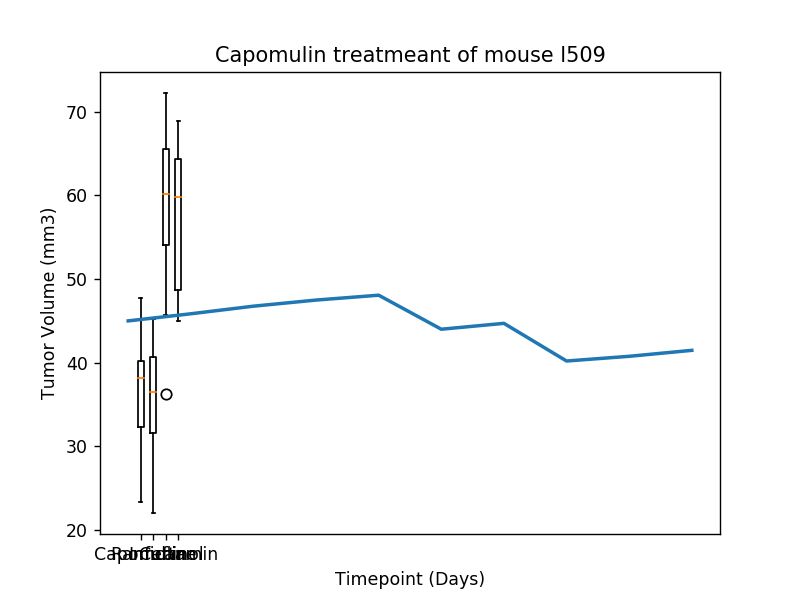

In [88]:
tumors1 = last_tumor.loc[last_tumor['Drug Regimen'] == "Capomulin", :]
tumors_1 = tumors1["Tumor Volume (mm3)"]
tumors2 = last_tumor.loc[last_tumor['Drug Regimen'] == "Ramicane", :]
tumors_2 = tumors2["Tumor Volume (mm3)"]
tumors3 = last_tumor.loc[last_tumor['Drug Regimen'] == "Infubinol", :]
tumors_3 = tumors3["Tumor Volume (mm3)"]
tumors4 = last_tumor.loc[last_tumor['Drug Regimen'] == "Ceftamin", :]
tumors_4 = tumors4["Tumor Volume (mm3)"]

data_to_plot = [tumors_1, tumors_2, tumors_3, tumors_4]

plt.figure(5)
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [89]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#merge_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how= "left")
Capomulin = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin", :]
tumor_vol = Capomulin.loc[Capomulin["Mouse ID"] == "l509",:]

x_axis = tumor_vol["Timepoint"]
y_axis = tumor_vol["Tumor Volume (mm3)"]

plt.figure(6)
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

<IPython.core.display.Javascript object>


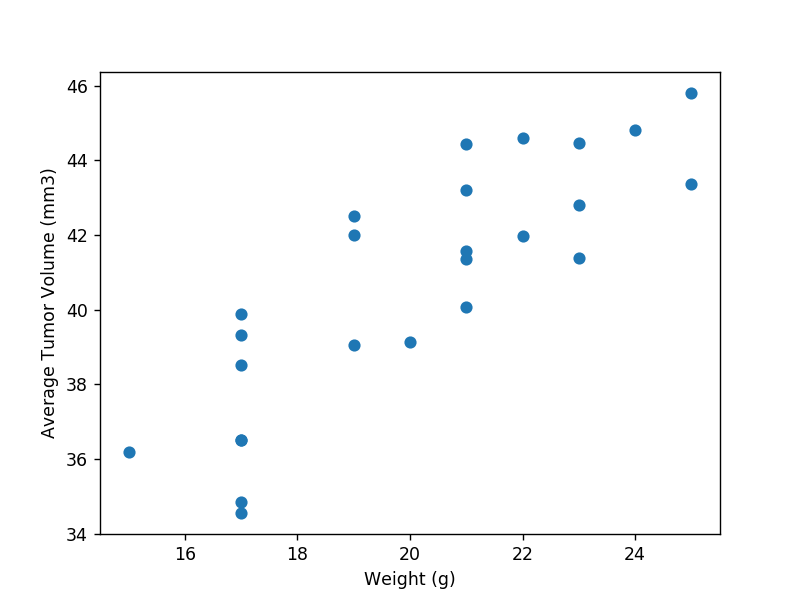

In [90]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg = Capomulin.groupby(['Mouse ID']).mean()

plt.figure(7)
plt.scatter(avg['Weight (g)'], avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [91]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation =round(st.pearsonr(avg['Weight (g)'],avg['Tumor Volume (mm3)'])[0],2)
print(f"correlation: {correlation}")

correlation: 0.84


In [92]:
model=st.linregress(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

<IPython.core.display.Javascript object>


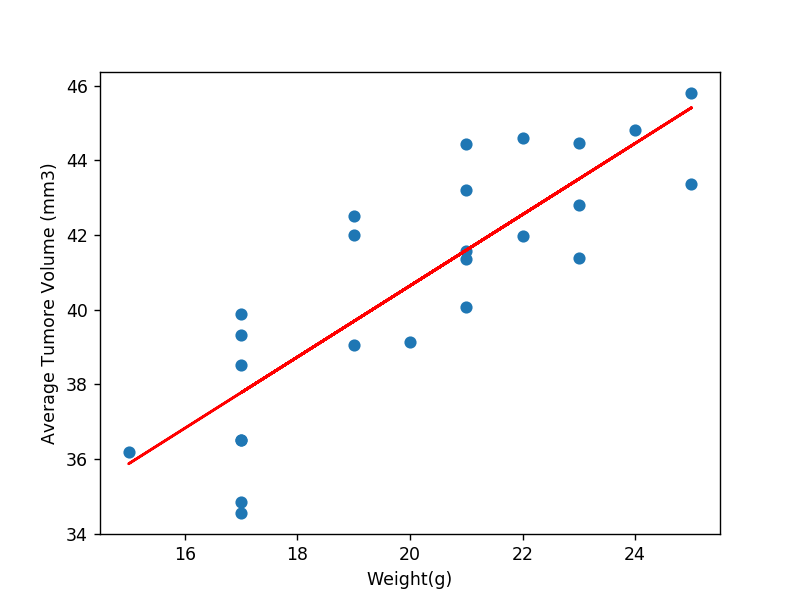

In [93]:
x_values = avg['Weight (g)']
y_values = avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(8)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()